## Import Modules

In [24]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Primary EDA

In [4]:
data = pd.read_csv("/kaggle/input/ner-dataset/ner_data.csv")
data.head()

,text,label
0,عايزة احط عنوان بيتي,X X X X
1,ابغى الفاتورة من فضلك,X X X X
2,عايزة اغير عنوان البيت,X X X X
3,ممكن اغير عنواني,X X X
4,عايز منيو ارابياتا جامعة الدول,X X X X X


In [5]:
data.shape

(5030, 2)

In [6]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
data["label"].nunique()

386

## Why is there 386 unique labels?

That's probably due to the fact that pandas treat xxx and xxxx differntly

In [8]:
data["label"].value_counts()

label
X X X X                                                       1169
X X X X X                                                      752
X X X                                                          669
X X X X X X                                                    436
X X                                                            309
                                                              ... 
X X X phone X X X X                                              1
Exclude X                                                        1
X X ItemName ItemName ItemName X                                 1
X PredefinedMealName PredefinedMealName PredefinedMealName       1
X X X itemnumber ItemName ItemName X ItemSize                    1
Name: count, Length: 386, dtype: int64

In [9]:
data[data["label"]=="X X X itemnumber ItemName ItemName X ItemSize"]

,text,label
5025,ضيف على الاوردر 3 بيج ماك كومبو لارج,X X X itemnumber ItemName ItemName X ItemSize


In [12]:
labeles = []
for i in data["label"]:
    labeles+=i.split()
print(len(labeles))
labeles[0:5]

22525


['X', 'X', 'X', 'X', 'X']

In [13]:
uni_labeles=set(labeles)
print(len(uni_labeles))
uni_labeles

13


{'Exclude',
 'Include',
 'ItemName',
 'ItemSize',
 'Language',
 'MenuName',
 'OrderNumber',
 'PredefinedMealName',
 'Topping_Exclude',
 'Topping_Include',
 'X',
 'itemnumber',
 'phone'}

In [14]:
words=[]
for i in data["text"]:
    words+=i.split()
print(len(words))
words[0:5]

22525


['عايزة', 'احط', 'عنوان', 'بيتي', 'ابغى']

In [15]:
uni_words = set(words)
print(len(uni_words))

2523


I'm going to create a new dataset with each word is corresponding to its category

In [16]:
d = {"words":words,"labels":labeles}
df = pd.DataFrame(d)

In [17]:
df.shape

(22525, 2)

In [18]:
df.head()

,words,labels
0,عايزة,X
1,احط,X
2,عنوان,X
3,بيتي,X
4,ابغى,X


In [65]:
df["labels"].value_counts()

labels
X                     19465
ItemName               1309
itemnumber              257
ItemSize                237
Topping_Include         226
Include                 174
PredefinedMealName      163
Language                151
MenuName                123
phone                   121
Exclude                 114
Topping_Exclude          98
OrderNumber              87
Name: count, dtype: int64

<Axes: xlabel='labels'>

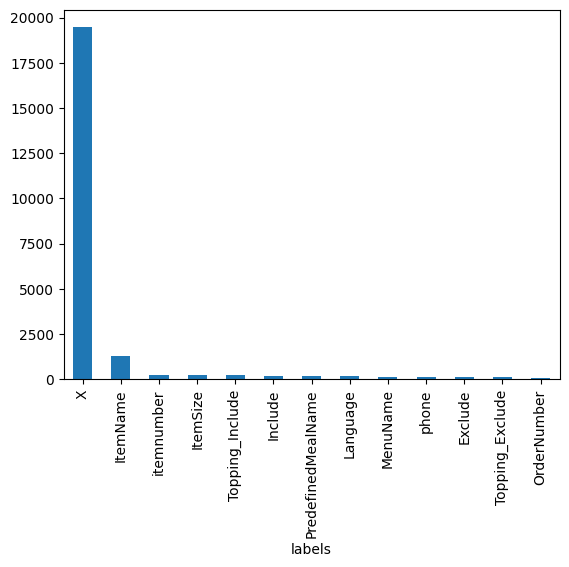

In [19]:
df["labels"].value_counts().plot(kind='bar')

In [20]:
x_precentage_in_labels=(19465/22525)*100
x_precentage_in_labels

86.41509433962264

I'm curious what would be the performance of a simple classifier on such data, I'm going to use a simplre mapping to represent the words of the text and the labels.

In [31]:
words_le1 = LabelEncoder()
words_le1.fit(df["words"])

enc_words = words_le1.transform(df["words"]).reshape(-1, 1)


enc_le1 = LabelEncoder()
enc_le1.fit(df["labels"])

enc_labels = enc_le1.transform(df["labels"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(enc_words, enc_labels, test_size = 0.33, random_state = 42)


clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [32]:
y_pred=clf1.predict(X_test)

print('Model accuracy score with criterion index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with criterion index: 0.9473


In [33]:
from sklearn.metrics import classification_report

enc_le1_name_mapping = dict(zip( enc_le1.transform(enc_le1.classes_),enc_le1.classes_))
print(enc_le1_name_mapping)

print(classification_report(y_test, y_pred, digits=4))

{0: 'Exclude', 1: 'Include', 2: 'ItemName', 3: 'ItemSize', 4: 'Language', 5: 'MenuName', 6: 'OrderNumber', 7: 'PredefinedMealName', 8: 'Topping_Exclude', 9: 'Topping_Include', 10: 'X', 11: 'itemnumber', 12: 'phone'}
              precision    recall  f1-score   support

           0     0.9444    0.4146    0.5763        41
           1     0.7353    0.3731    0.4950        67
           2     0.7343    0.8904    0.8049       447
           3     0.8108    0.9231    0.8633        65
           4     0.9565    0.8627    0.9072        51
           5     0.6429    0.6923    0.6667        39
           6     0.6818    0.6250    0.6522        24
           7     0.3333    0.0769    0.1250        52
           8     0.5417    0.3824    0.4483        34
           9     0.5152    0.4658    0.4892        73
          10     0.9801    0.9814    0.9807      6411
          11     0.8511    0.9091    0.8791        88
          12     0.8250    0.7857    0.8049        42

    accuracy              

In [83]:
"""import matplotlib.pyplot as plt # data visualization
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) """

'import matplotlib.pyplot as plt # data visualization\nplt.figure(figsize=(12,8))\n\nfrom sklearn import tree\n\ntree.plot_tree(clf.fit(X_train, y_train)) '

## I wonder what would be the performance without x in the dataset

In [45]:
new_words=[]
new_l=[]
for i in range(len(words)):
    if labeles[i]!="X":
        new_l.append(labeles[i])
        new_words.append( words[i])
    
dd = {"words":new_words,"labels":new_l}
mod_df = pd.DataFrame(dd)

In [46]:
words_le2 = LabelEncoder()
words_le2.fit(mod_df["words"])

enc_words = words_le2.transform(mod_df["words"]).reshape(-1, 1)

enc_le12 = LabelEncoder()
enc_le12.fit(mod_df["labels"])

enc_labels = enc_le12.transform(mod_df["labels"]).reshape(-1, 1)
enc_le2_name_mapping = dict(zip( enc_le12.transform(enc_le12.classes_),enc_le12.classes_))
print(enc_le2_name_mapping)

X_train, X_test, y_train, y_test = train_test_split(enc_words, enc_labels, test_size = 0.33, random_state = 42)


clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)

{0: 'Exclude', 1: 'Include', 2: 'ItemName', 3: 'ItemSize', 4: 'Language', 5: 'MenuName', 6: 'OrderNumber', 7: 'PredefinedMealName', 8: 'Topping_Exclude', 9: 'Topping_Include', 10: 'itemnumber', 11: 'phone'}


In [48]:
y_pred=clf2.predict(X_test)

print('Model accuracy score with criterion index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with criterion index: 0.8129


In [49]:
print(enc_le2_name_mapping)

print(classification_report(y_test, y_pred, digits=4))

{0: 'Exclude', 1: 'Include', 2: 'ItemName', 3: 'ItemSize', 4: 'Language', 5: 'MenuName', 6: 'OrderNumber', 7: 'PredefinedMealName', 8: 'Topping_Exclude', 9: 'Topping_Include', 10: 'itemnumber', 11: 'phone'}
              precision    recall  f1-score   support

           0     0.7556    0.8718    0.8095        39
           1     0.9412    0.8421    0.8889        57
           2     0.8197    0.8802    0.8489       434
           3     0.9452    0.9583    0.9517        72
           4     0.9423    0.9800    0.9608        50
           5     0.9286    0.8864    0.9070        44
           6     0.6250    0.5556    0.5882        27
           7     0.5000    0.2105    0.2963        57
           8     0.5161    0.6154    0.5614        26
           9     0.5652    0.5200    0.5417        75
          10     0.9263    0.9778    0.9514        90
          11     0.7895    0.7692    0.7792        39

    accuracy                         0.8129      1010
   macro avg     0.7712    0.7556  

In [50]:
w=["لارج"]
t_w=words_le2.transform(w).reshape(-1, 1)
enc_le2_name_mapping[clf2.predict(t_w)[0]]

'ItemSize'

obvi, there are much better ways to deal with that.